In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

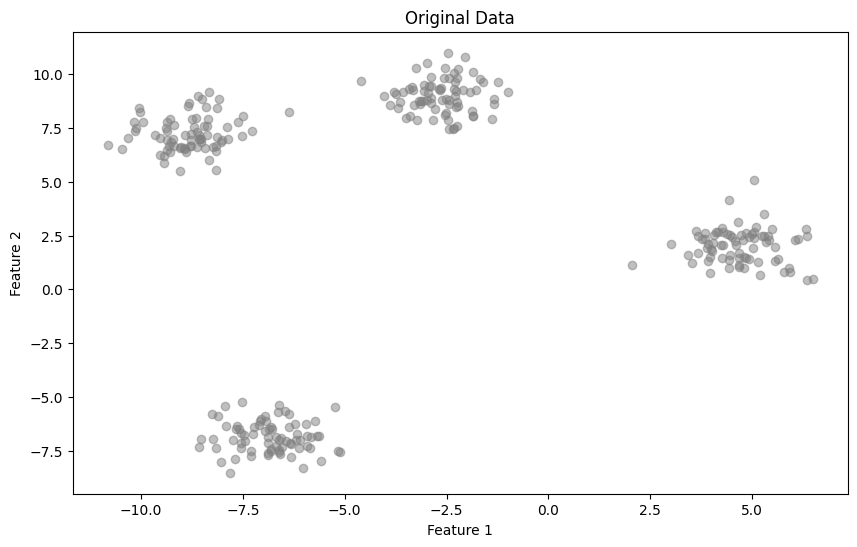

Dataset shape: (300, 2)


In [2]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

print("Dataset shape:", X.shape)

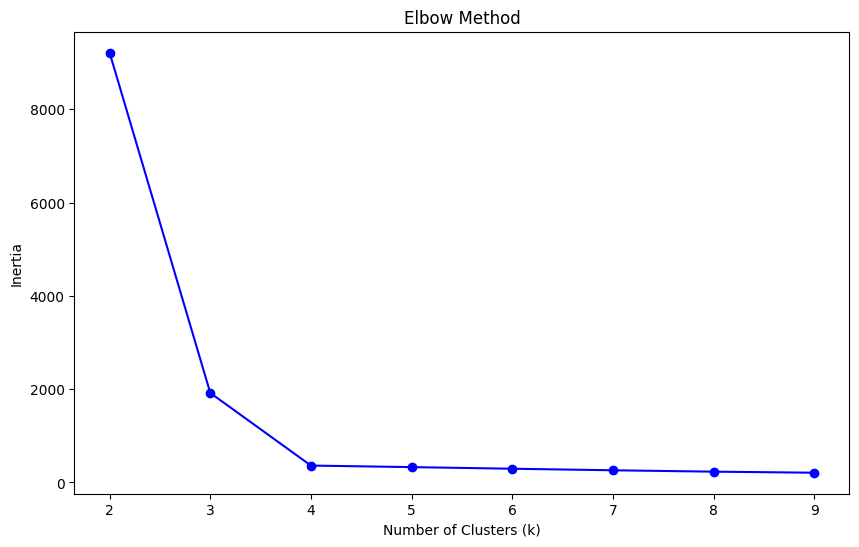

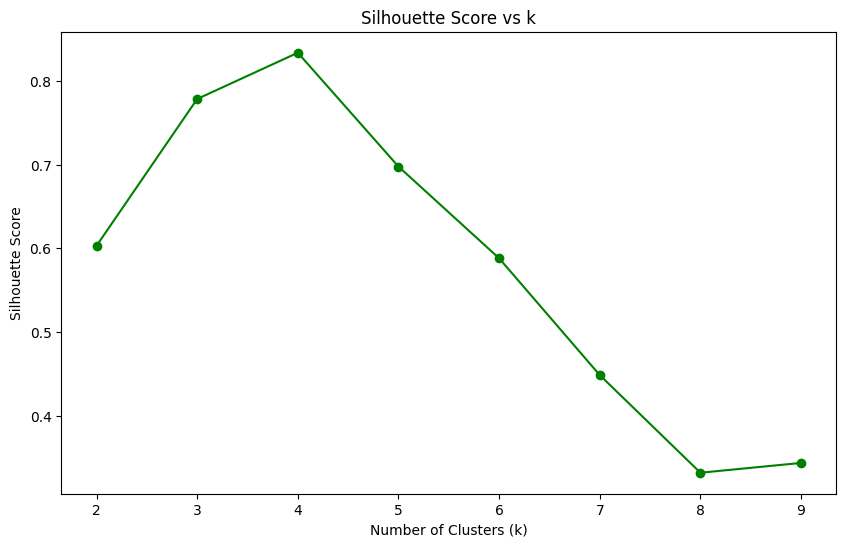

In [3]:
inertias = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()

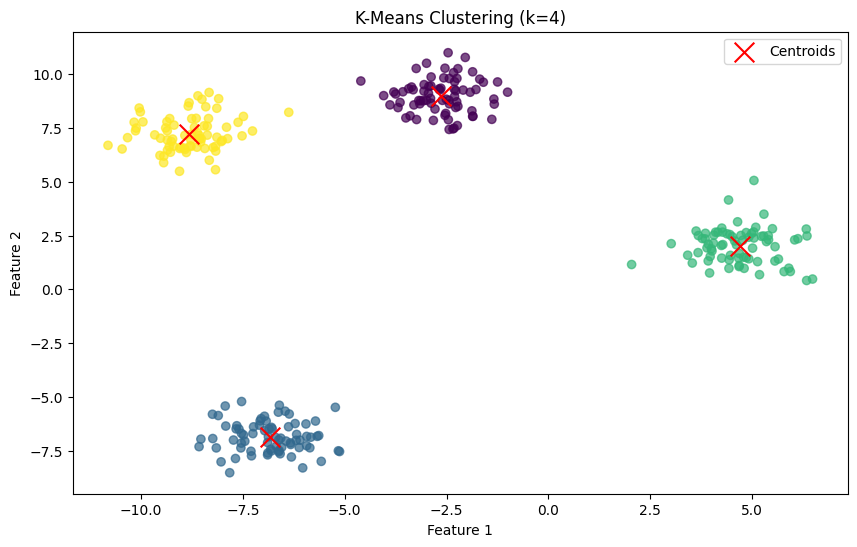


--- K-Means Clustering ---
Silhouette Score: 0.8335
Inertia: 362.4724


In [4]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering (k=4)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

sil_score = silhouette_score(X, labels)
print(f"\n--- K-Means Clustering ---")
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Inertia: {kmeans.inertia_:.4f}")